In [1]:
from keras_segmentation.predict import predict, visualize_segmentation
from keras_segmentation.data_utils.data_loader import get_image_array
import matplotlib.pyplot as plt
import random
import os
import keras
import cv2
import numpy as np
import colorsys

In [2]:
CHECKPOINT = "checkpoints/model_vgg_segnet.01_combined.keras"
IMAGE_DIR = "_data/combined/test"
OUT = "out/test.png"
INPUT_SHAPE = (416, 608)
CLASSES = 25

2024-07-12 10:33:36.833737: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1928] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1044 MB memory:  -> device: 0, name: NVIDIA RTX A6000, pci bus id: 0000:06:00.0, compute capability: 8.6
2024-07-12 10:33:37.587515: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907
2024-07-12 10:33:38.812779: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 202.53MiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-07-12 10:33:38.812860: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 202.53MiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
20

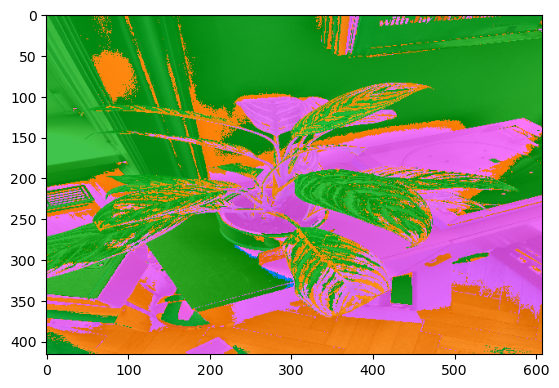

In [3]:
file = os.path.join(IMAGE_DIR, random.sample(os.listdir(IMAGE_DIR), 1)[0])
img = cv2.imread(file)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

x = get_image_array(img, INPUT_SHAPE[1], INPUT_SHAPE[0], ordering='channels_last')

model = keras.models.load_model(CHECKPOINT, compile=False)

pr = model(np.expand_dims(x, 0))[0].numpy()

y = np.argmax(pr, axis=2)
#colors = [colorsys.hsv_to_rgb((255 / CLASSES) * i, 1, 1) for i in range(CLASSES)]
colors = [[0, 255, 0]] * 25

seg_img = visualize_segmentation(y, x, n_classes=CLASSES,
                                     colors=colors, overlay_img=True,
                                     show_legends=False)
seg_img = seg_img.astype(int)
plt.imshow(seg_img)
plt.show()